In [2]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [3]:
import imp

In [10]:
import xy

In [3470]:
imp.reload(xy)

ValueError: invalid literal for int() with base 10: '2005-01-04'

# $因子描述：LBSC （LongBackShortContango）$

***做多深度的 贴水/升水率***  
思路是在贴水水平/贴水水平 处在历史高位的时候滚动吃贴水

In [11]:
data = pd.read_excel(r'\\share\FREE\lsh\his_data\日频数据.xlsx',sheet_name='期货',header=[0,1,2],index_col=0)

In [12]:
data.index = data.index.map(lambda x: str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[-2:])

In [13]:
div = pd.read_csv(r'E:\PyProject\index_div.csv',index_col=0)

In [14]:
div.index = div.index.map(lambda x:str(x))

In [ ]:
IH

<Axes: >

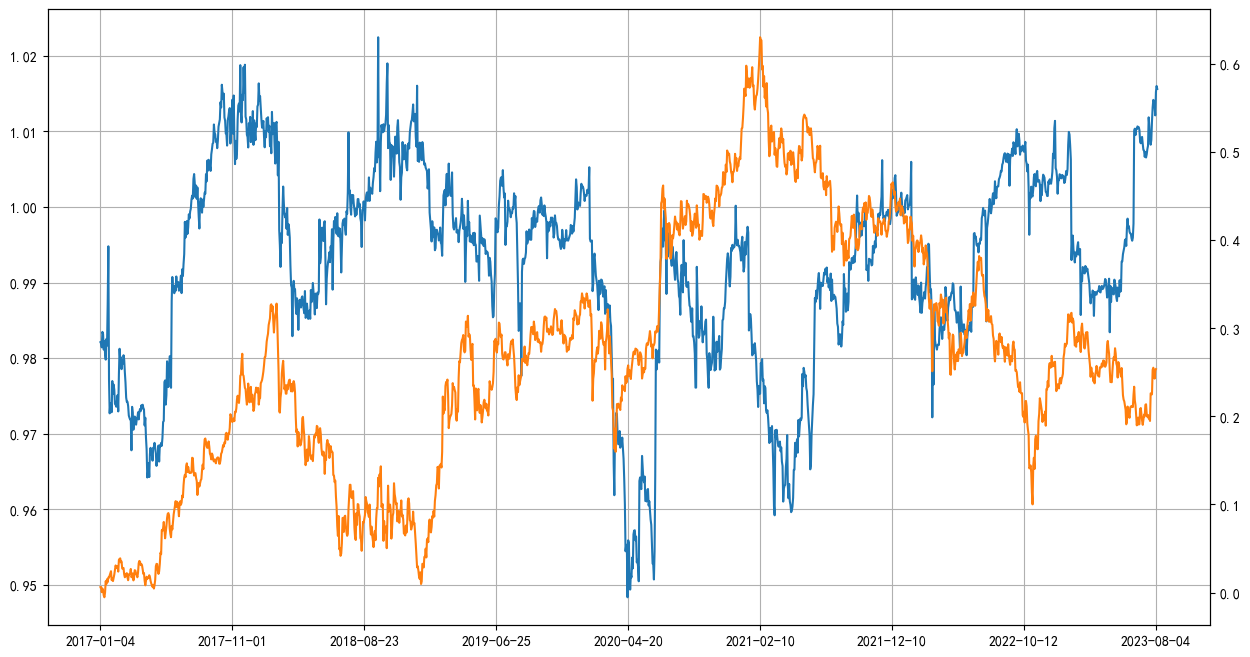

In [14]:
IH = data[[('IH00C1.CFE', 'IH当月连续', '收盘价'),('IH00C2.CFE', 'IH下月连续', '收盘价'),('IH00C3.CFE', 'IH下季连续', '收盘价'),('IH00C4.CFE', 'IH隔季连续', '收盘价')]]
IFHhold = data[[('IH00C1.CFE', 'IH当月连续', '持仓量'),('IH00C2.CFE', 'IH下月连续', '持仓量'),('IH00C3.CFE', 'IH下季连续', '持仓量'),('IH00C4.CFE', 'IH隔季连续', '持仓量')]]

IH['C2-C1/C1'] = (IH[('IH00C2.CFE', 'IH下月连续', '收盘价')].rolling(1).mean() - IH[('IH00C1.CFE', 'IH当月连续', '收盘价')])/IH[('IH00C1.CFE', 'IH当月连续', '收盘价')].rolling(1).mean()
IH['C3-C2/C1'] = (IH[('IH00C3.CFE', 'IH下季连续', '收盘价')].rolling(1).mean() - IH[('IH00C2.CFE', 'IH下月连续', '收盘价')])/IH[('IH00C1.CFE', 'IH当月连续', '收盘价')].rolling(1).mean()
IH['C4-C3/C1'] = (IH[('IH00C4.CFE', 'IH隔季连续', '收盘价')].rolling(1).mean() - IH[('IH00C3.CFE', 'IH下季连续', '收盘价')])/IH[('IH00C1.CFE', 'IH当月连续', '收盘价')].rolling(1).mean()
# IF['C2-C1/C1'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')] - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')])/IF[('IF00C1.CFE', 'IF当月连续', '收盘价')]

IH['contango'] = ((1+IH['C2-C1/C1']) * (1+IH['C3-C2/C1']) * (1+IH['C4-C3/C1']))
# IF['C2-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C3-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C4-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
IH['contango'].loc['2017-01-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)

# (IF['C4-C1/C1'].loc['2015-05-04':].rolling(10).mean() - IF['C2-C1/C1'].loc['2015-05-04':].rolling(10).mean()).plot(figsize=(15,8),grid=True)
# (IF['C4-C1/C1'].loc['2015-05-04':].rolling(10).mean() - IF['C3-C1/C1'].loc['2015-05-04':].rolling(10).mean()).plot(figsize=(15,8),grid=True)


xy.Index_rets.loc['50','2017-01-04':].cumsum().plot(figsize=(15,8),secondary_y=True)
# IF_hold.apply(lambda x:x/IF_hold.sum(axis=1)).loc['2015-05-04':,('IF00C4.CFE', 'IF隔季连续', '持仓量')].plot(figsize=(15,8),secondary_y=True)

In [16]:
IF = data[[('IH00C1.CFE', 'IH当月连续', '收盘价'),('IH00C2.CFE', 'IH下月连续', '收盘价'),('IH00C3.CFE', 'IH下季连续', '收盘价'),('IH00C4.CFE', 'IH隔季连续', '收盘价')]]
IF_hold = data[[('IH00C1.CFE', 'IH当月连续', '持仓量'),('IH00C2.CFE', 'IH下月连续', '持仓量'),('IH00C3.CFE', 'IH下季连续', '持仓量'),('IH00C4.CFE', 'IH隔季连续', '持仓量')]]

In [17]:
IF['close'] = xy.cl.T['50']

In [18]:
div_data_IF = pd.read_excel(r'..\..\代码表50.xlsx')

In [19]:
div_data_IF.index = div_data_IF.date.apply(lambda x: str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:])

In [20]:
next_season_recover = {}
far_next_season_recover = {}

next_month_days_left = {}
next_season_days_left = {}
far_next_season_days_left = {}

for d, row in div_data_IF.iterrows():
    next_month_crt = row.xydm
    next_season_crt = row.jydm
    far_next_season_crt = row.yydm
    
    _next_month_day_left = div_data_IF[(div_data_IF.dydm==next_month_crt)].groupby('dueday')['days'].max().sum() + row['days']
    next_month_days_left[d] = _next_month_day_left
    
    if next_season_crt == 'IH2309':
        continue
    else:
        # 下季回补的起始点
        div_next_season_sum = div_data_IF[(div_data_IF.dydm==next_season_crt)|(div_data_IF.xydm==next_season_crt)&(div_data_IF.jydm!=next_season_crt)]['分红回落点位'].sum()
        _win = div_data_IF[div_data_IF.jydm==next_season_crt]
        _day_left = div_data_IF[(div_data_IF.dydm==next_season_crt)|(div_data_IF.xydm==next_season_crt)].groupby('dueday')['days'].max().sum() + row['days']
        # 下季合约为当前合约的总回补
        next_season_recover[d] = (div_data_IF.loc[d:_win.index[-1],'分红回落点位'].sum() + div_next_season_sum)
        next_season_days_left[d] = _day_left
    
    if far_next_season_crt == 'IH2312':
        continue
    else:
        # 隔季回补的起始点
        div_far_next_season_sum = div_data_IF[(div_data_IF.dydm==far_next_season_crt)|(div_data_IF.xydm==far_next_season_crt)|(div_data_IF.jydm==far_next_season_crt)&(div_data_IF.yydm!=far_next_season_crt)]['分红回落点位'].sum()
        _far_win = div_data_IF[div_data_IF.yydm==far_next_season_crt]
        _far_day_left = div_data_IF[(div_data_IF.dydm==far_next_season_crt)|(div_data_IF.xydm==far_next_season_crt)|(div_data_IF.jydm==far_next_season_crt)].groupby('dueday')['days'].max().sum() + row['days']
        
        # 隔季合约为当前合约的总回补
        far_next_season_recover[d] = div_data_IF.loc[d:_far_win.index[-1],'分红回落点位'].sum() + div_far_next_season_sum
        far_next_season_days_left[d] = _far_day_left
        
    # break

In [21]:
div_data_IF['下季回补'] = pd.Series(next_season_recover)
div_data_IF['隔季回补'] = pd.Series(far_next_season_recover)

div_data_IF['下月剩余天数'] = pd.Series(next_month_days_left).mask(pd.Series(next_month_days_left)==0,0.5)
div_data_IF['下季剩余天数'] = pd.Series(next_season_days_left).mask(pd.Series(next_season_days_left)==0,0.5)
div_data_IF['隔季剩余天数'] = pd.Series(far_next_season_days_left).mask(pd.Series(far_next_season_days_left)==0,0.5)
div_data_IF['days'] = div_data_IF['days'].mask(div_data_IF['days']==0, 0.5)

<Axes: xlabel='date'>

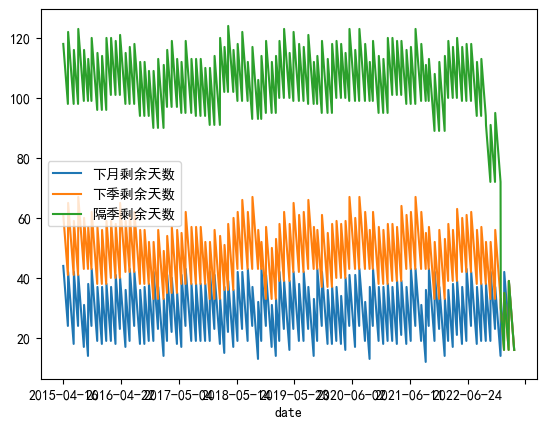

In [22]:
div_data_IF.dropna().iloc[:,-3:].plot()

<Axes: xlabel='date'>

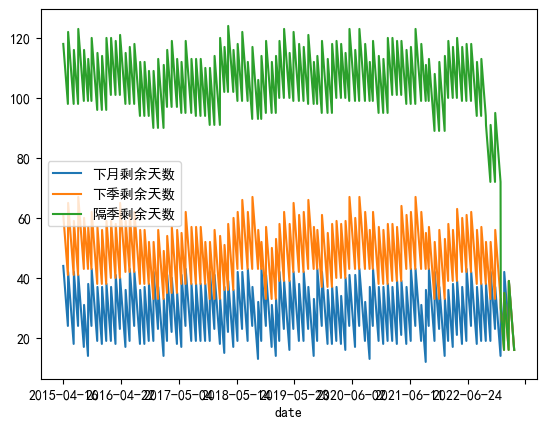

In [23]:
div_data_IF.dropna().iloc[:,-3:].plot()

<Axes: xlabel='date'>

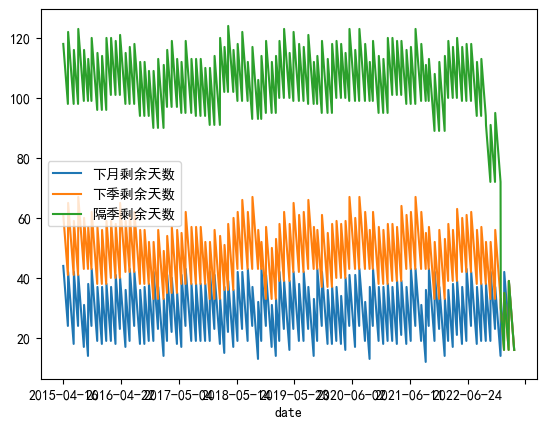

In [24]:
div_data_IF.dropna().iloc[:,-3:].plot()

In [25]:
IF[IF.columns[0]] = IF[IF.columns[0]] + div_data_IF['当月回补']
IF[IF.columns[1]] = IF[IF.columns[1]] + div_data_IF['下月回补']
IF[IF.columns[2]] = IF[IF.columns[2]] + div_data_IF['下季回补']
IF[IF.columns[3]] = IF[IF.columns[3]] + div_data_IF['隔季回补']

In [26]:
IF['days1'] = div_data_IF['days']
IF['days2'] = div_data_IF['下月剩余天数']
IF['days3'] = div_data_IF['下季剩余天数']
IF['days4'] = div_data_IF['隔季剩余天数']

In [27]:
start_d = '2016-01-04'
end_d = '2023-04-20'
al = .1

In [28]:
from datetime import datetime, timedelta

def third_friday(year, month):
    day = 1
    while True:
        date = datetime(year, month, day)
        if(date.weekday() == 3):  # 4表示星期五
            break
        day += 1
    third_thursday_date = date + timedelta(days=14)
    third_friday_date = date + timedelta(days=15)  # 增加14天得到第三个周五
    return third_friday_date

# 示例日期字符串列表
date_strings = [i for i in IF.index.map(lambda x:str(x))]

third_fridays = []
for date_str in date_strings:
    year, month, _ = map(int, date_str.split('-'))
    third_friday_date = third_friday(year, month)
    third_fridays.append(third_friday_date.strftime('%Y-%m-%d'))
    # third_fridays.append(third_thursday_date.strftime('%Y-%m-%d'))

In [29]:
IF = IF.apply(lambda x:x.mask(x.index.isin(set(third_fridays)),np.nan)).ffill()

<Axes: >

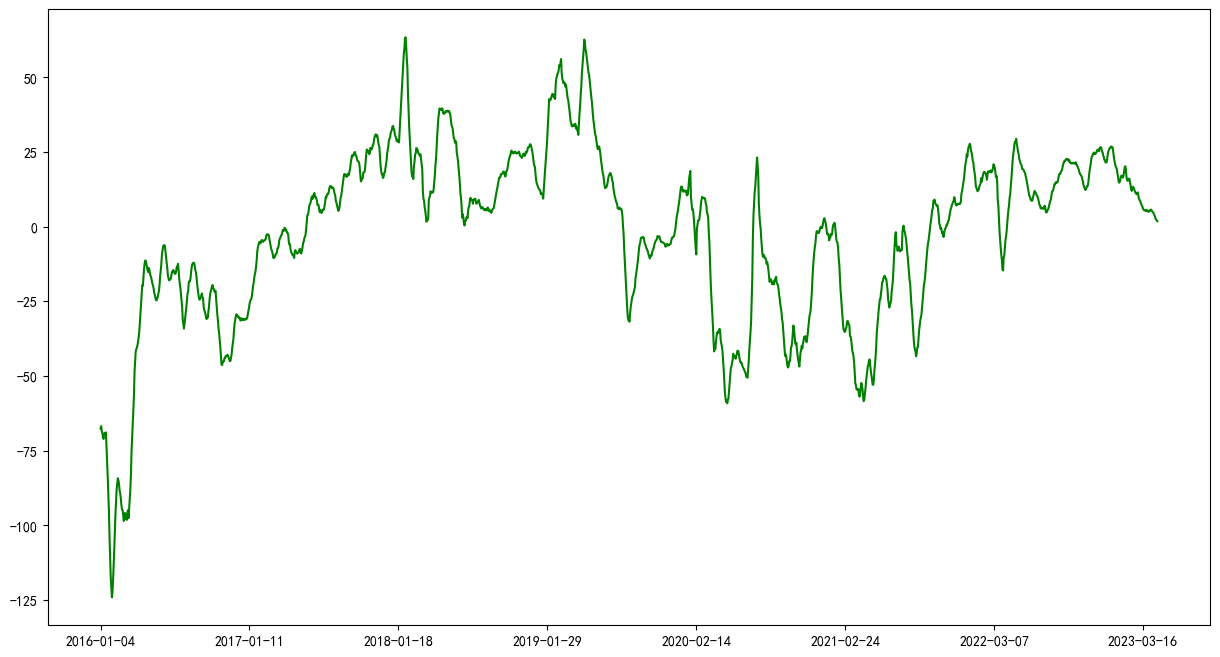

In [30]:
# IF['C1-C0/C0 %'] = (IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean() - IF['close'].rolling(1).mean())/IF['close'].rolling(1).mean()
# IF['C2-C0/C0 %'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')].rolling(1).mean() - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean())/IF['close'].rolling(1).mean()
# IF['C3-C0/C0 %'] = (IF[('IF00C3.CFE', 'IF下季连续', '收盘价')].rolling(1).mean() - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean())/IF['close'].rolling(1).mean()
# IF['C4-C0/C0 %'] = (IF[('IF00C4.CFE', 'IF隔季连续', '收盘价')].rolling(1).mean() - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean())/IF['close'].rolling(1).mean()
# IF['C2-C1/C1'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')] - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')])/IF[('IF00C1.CFE', 'IF当月连续', '收盘价')]
# IF['C'] = (IF[('IF00C3.CFE', 'IF下季连续', '收盘价')].rolling(1).mean() / IF[('IF00C1.CFE', 'IF当月连续', '收盘价')].rolling(1).mean())
# IF['contago1'] = ( (IF['C1-C0/C0 %']).rolling(1).mean())/div_data_IF['days']  
# IF['contago1'] = (IF['contago1'].map(lambda x:min(x,0.03) if x > 0 else max(x,-0.03)))
# IF['contago2'] = ( (IF['C2-C0/C0 %']).rolling(1).mean())/div_data_IF['下月剩余天数']
# IF['contago3'] = ( (IF['C3-C0/C0 %']).rolling(1).mean())/div_data_IF['下季剩余天数']
# IF['contago4'] = ( (IF['C4-C0/C0 %']).rolling(1).mean())/div_data_IF['隔季剩余天数']

# Cox-Stuart统计量，越大，则越倾向于升水序列 
#+ (IF[['contago1','contago2']].mean(axis=1))
# IF['C1-C3'] = (IF.contago1 - IF.contago3)/1
# IF['C2-C3'] = (IF.contago2 - IF.contago3)/1

# convex 值越大，预期越快上涨
# IF['min_ctg'] = IF[['contago4','contago3','contago2','contago1']].min(axis=1)
# IF['convex'] = IF[['contago2','contago1']].mean(axis=1) - IF['min_ctg']  #IF[['contago4','contago3','contago2','contago1']].sum(axis=1) - 4*IF['min_ctg']

# IF['C2-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C3-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C4-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# (IF['contago1'].loc[start_d:end_d]).rolling(1).mean().plot(figsize=(15,8),color='red',secondary_y=True)
# (IF['contago2'].loc[start_d:end_d]).rolling(1).mean().plot(figsize=(15,8),color='red',alpha=0.7,secondary_y=True)
# (IF['contago3'].loc[start_d:end_d]).rolling(1).mean().plot(figsize=(15,8),color='red',alpha=0.4,secondary_y=True)
# (IF['contago4'].loc[start_d:end_d]).rolling(1).mean().plot(figsize=(15,8),color='red',alpha=0.2,secondary_y=True)
# pd.Series(0.3,index=(IF['contago3'].loc[start_d:end_d].rolling(10).mean()-1).index).plot(figsize=(15,8),color='blue',alpha=0.6,style='--')
# pd.Series(0.6,index=(IF['contago3'].loc[start_d:end_d].rolling(10).mean()-1).index).plot(figsize=(15,8),color='blue',alpha=0.6,style='--')
# pd.Series(0,index=(IF['contago3'].loc[start_d:end_d].rolling(10).mean()-1).index).plot(figsize=(15,8),color='black',alpha=1,secondary_y=True,style='--')
IF['CS-test'].rolling(10).mean().loc[start_d:end_d].plot(figsize=(15,8),color='green')
# (IF['convex2']).rolling(1).mean().loc[start_d:end_d].plot(figsize=(15,8),color='blue')

# (index_YSBgap/10).loc[start_d:end_d,'300'].plot(figsize=(15,8),color='yellow')
# plt.show()
# (xy.Index_rets.loc['300',start_d:end_d].cumsum()/1).plot(figsize=(15,8),color='black',grid=True)
# pd.Series(0,index=(IF['contago3'].loc[start_d:end_d].rolling(10).mean()-1).index).plot(figsize=(15,8),color='black',alpha=1,style='--')
# IF_hold.apply(lambda x:x/IF_hold.sum(axis=1)).loc['2015-05-04':,('IF00C4.CFE', 'IF隔季连续', '持仓量')].plot(figsize=(15,8),secondary_y=True)

In [38]:
IF['CS-test'] = (IF[('IH00C3.CFE', 'IH下季连续', '收盘价')]  - 1*IF['close'])

In [39]:
index_YSBgap = pd.read_csv('E:\PyProject\Index_valuation\index_YSBgap.csv',index_col=0)

index_YSBgap1 = pd.read_excel(r'E:\PyProject\Index_valuation\index_YSBgap1.xlsx',index_col=0)
index_YSBgap1.index = index_YSBgap1.index.map(lambda x:str(x)[:10]) 

## 50

In [45]:
SIGS = pd.concat([
    (IF['CS-test']).loc['2010-05-04':'2023-08-04'],
    (index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,50].rename('DB'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,50].rolling(720).apply(lambda x: x.mean()+2.*x.std()).loc['2016-12-14':'2023-08-04'].rename('upline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,50].rolling(720).apply(lambda x: x.mean()-2.*x.std()).loc['2016-12-14':'2023-08-04'].rename('downline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,50].rolling(720).apply(lambda x: x.mean()).loc['2016-12-14':'2023-08-04'].rename('midline')
],axis=1).shift().loc['2016-01-04':]

In [46]:
position = {}
position1 = {}
pre_sig = np.nan

for d, row in SIGS.dropna().iterrows():
    if row.DB <= row.downline:
        position1[d] = -1
    elif row.DB >= row.downline:
        position1[d] = 1
    else:
        position1[d] = np.nan
        
    
    if row['CS-test'] < 0:
        if row.DB <= row.downline:
            position[d] = -1
        else:
            position[d] = np.nan
            
    elif row['CS-test'] > 0:
        if row.DB >= row.upline:
            position[d] = 1
        else:
            position[d] = np.nan
    else:
        position[d] = np.nan


<Axes: >

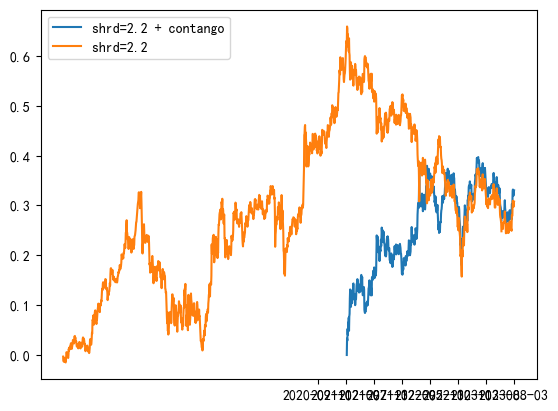

In [44]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=2.2 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=2.2 ').cumsum().plot(legend=True)

<Axes: >

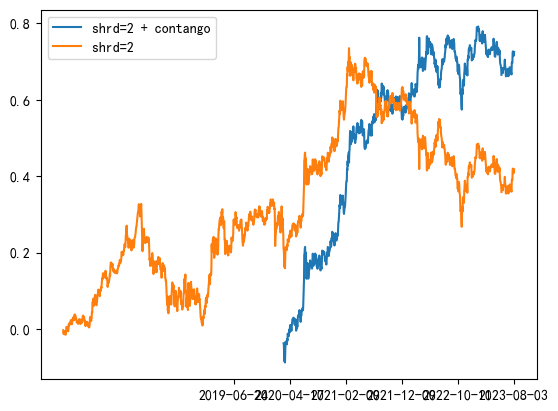

In [47]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=2 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=2 ').cumsum().plot(legend=True)

<Axes: >

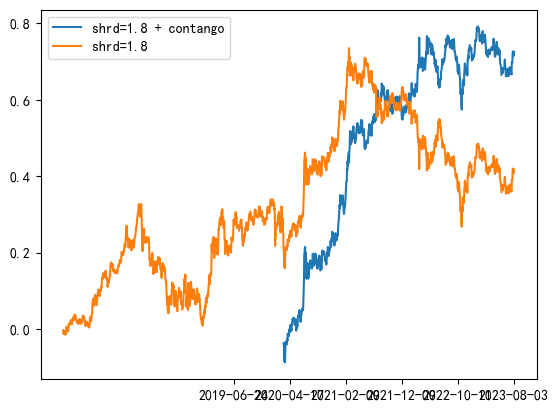

In [3874]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=1.8 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=1.8 ').cumsum().plot(legend=True)

<Axes: >

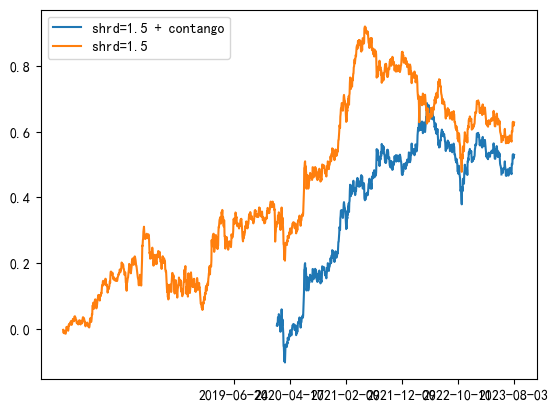

In [3877]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=1.5 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=1.5 ').cumsum().plot(legend=True)

<Axes: >

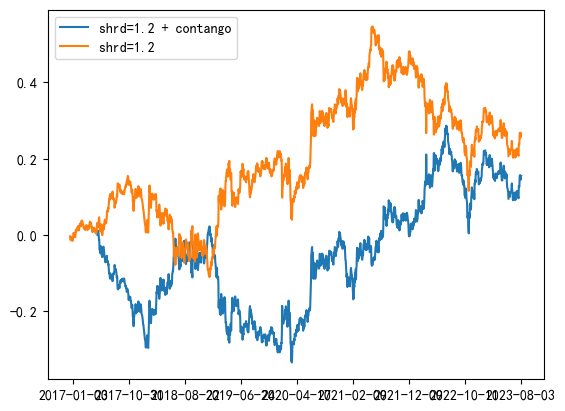

In [3880]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=1.2 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=1.2 ').cumsum().plot(legend=True)

<Axes: >

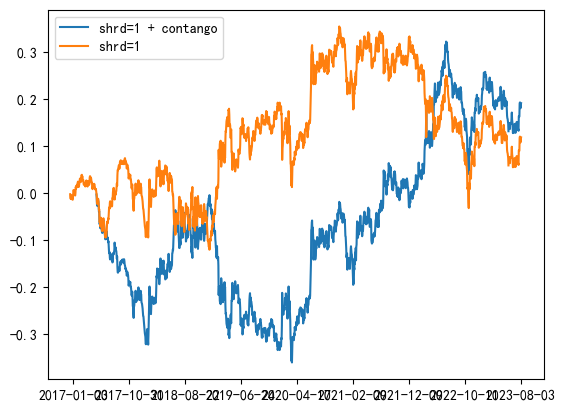

In [3883]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=1 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['50']).rename('shrd=1 ').cumsum().plot(legend=True)

<Axes: >

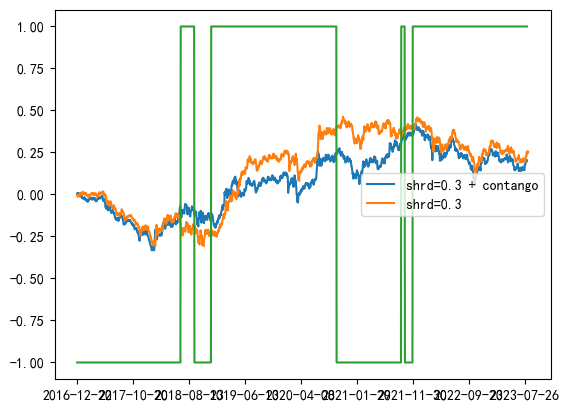

In [3894]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['50']).dropna().rename('shrd=0.3 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['50']).dropna().rename('shrd=0.3 ').cumsum().plot(legend=True)
pd.Series(position).ffill().shift().dropna().plot()

<Axes: >

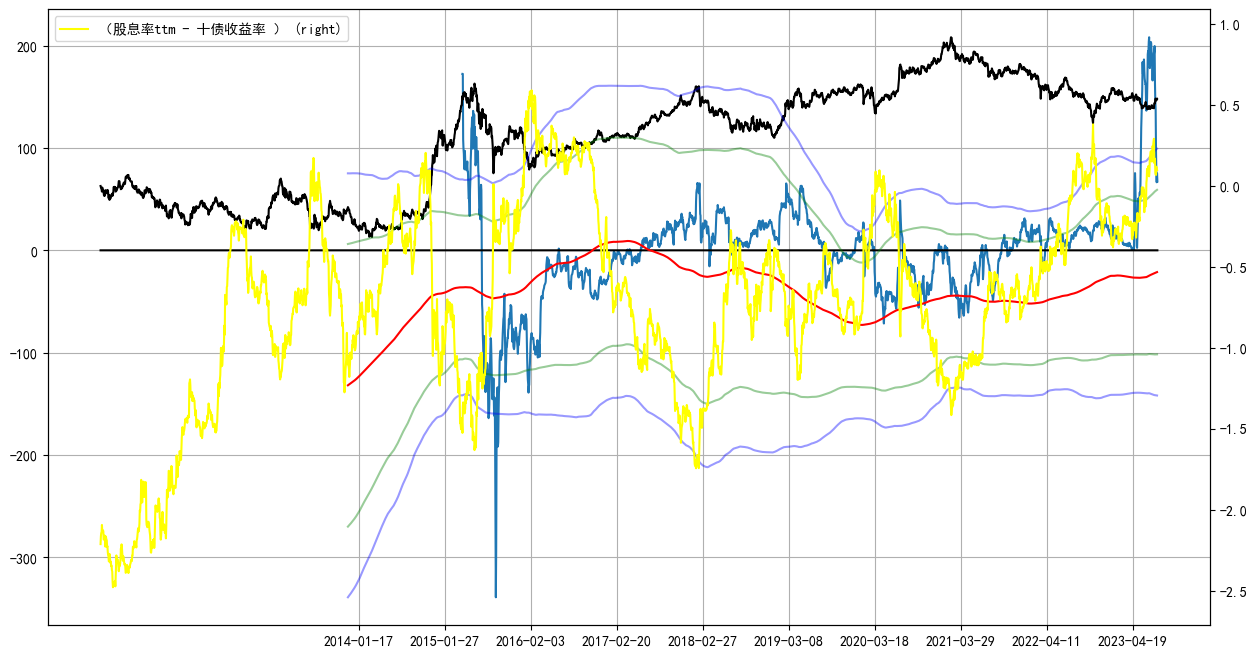

In [3916]:
(IF['CS-test']).loc['2010-12-14':'2023-08-04'].ewm(1).mean().shift().plot()
pd.Series(0,(-IF['CS-test']).loc['2010-12-14':'2023-08-04'].rolling(1).mean().index).plot(color='black',grid=True)
(xy.Index_rets.loc['50',index_YSBgap1.index & (IF['CS-test']).loc['2010-12-14':'2023-08-04'].index].cumsum()/1).plot(figsize=(15,8),color='black',grid=True,secondary_y=True)
# index_YSBgap1.loc[ index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.9)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
# index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.5)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
# index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.1)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,50].rolling(720).apply(lambda x: x.mean()+1.8*x.std()).loc['2010-12-14':'2023-08-04'].plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,50].rolling(720).apply(lambda x: x.mean()-1.8*x.std()).loc['2010-12-14':'2023-08-04'].plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,50].rolling(720).apply(lambda x: x.mean()).loc['2010-12-14':'2023-08-04'].plot(color='red',alpha=1,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,50].rolling(720).apply(lambda x: x.mean()+1.2*x.std()).loc['2010-12-14':'2023-08-04'].plot(color='green',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,50].rolling(720).apply(lambda x: x.mean()-1.2*x.std()).loc['2010-12-14':'2023-08-04'].plot(color='green',alpha=0.4,figsize=(15,8),secondary_y=True)


# index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':end_d].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()+3*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
# index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':end_d].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()-3*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
(index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,50].rename('（股息率ttm - 十债收益率 ）').plot(figsize=(15,8),color='yellow',secondary_y=True,legend='True')

## 300

In [49]:
SIGS = pd.concat([
    (IF['CS-test']).loc['2010-05-04':'2023-08-04'],
    (index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,300].rename('DB'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()+2*x.std()).loc['2016-12-14':'2023-08-04'].rename('upline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()-2*x.std()).loc['2016-12-14':'2023-08-04'].rename('downline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()).loc['2016-12-14':'2023-08-04'].rename('midline')
],axis=1).shift().loc['2010-01-04':]

In [50]:
position = {}
position1 = {}
pre_sig = np.nan

for d, row in SIGS.dropna().iterrows():
    if row.DB <= row.downline:
        position1[d] = -1
    elif row.DB >= row.downline:
        position1[d] = 1
    else:
        position1[d] = np.nan
        
    
    if row['CS-test'] < 0:
        if row.DB <= row.downline:
            position[d] = -1
        else:
            position[d] = np.nan
            
    elif row['CS-test'] > 0:
        if row.DB >= row.upline:
            position[d] = 1
        else:
            position[d] = np.nan
    else:
        position[d] = np.nan


<Axes: >

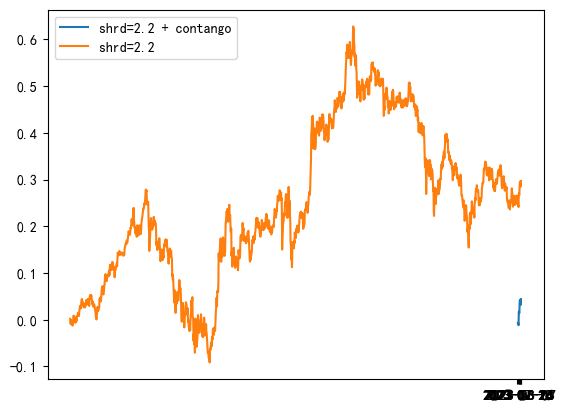

In [51]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=2.2 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=2.2 ').cumsum().plot(legend=True)

<Axes: >

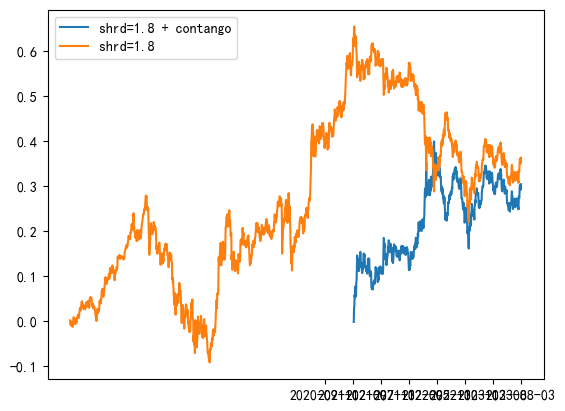

In [ ]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=1.8 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=1.8 ').cumsum().plot(legend=True)

<Axes: >

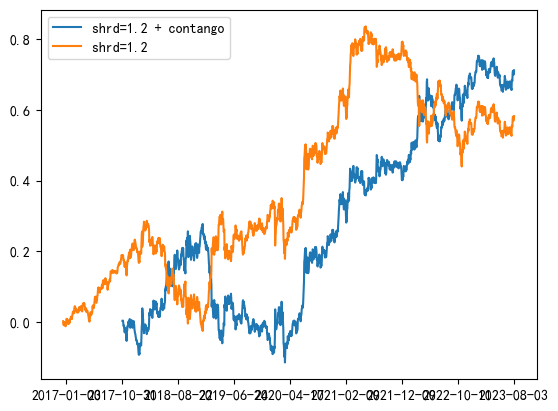

In [3747]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=1.5 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=1.5 ').cumsum().plot(legend=True)

<Axes: >

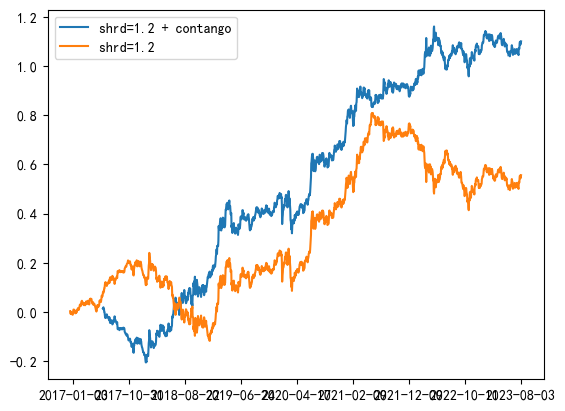

In [3744]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=1.2 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=1.2 ').cumsum().plot(legend=True)

<Axes: >

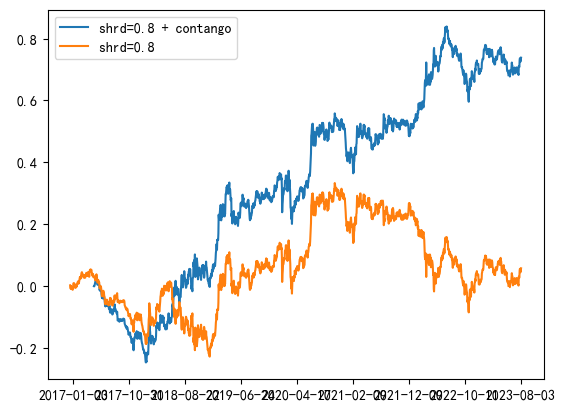

In [3756]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=0.8 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=0.8 ').cumsum().plot(legend=True)

<Axes: >

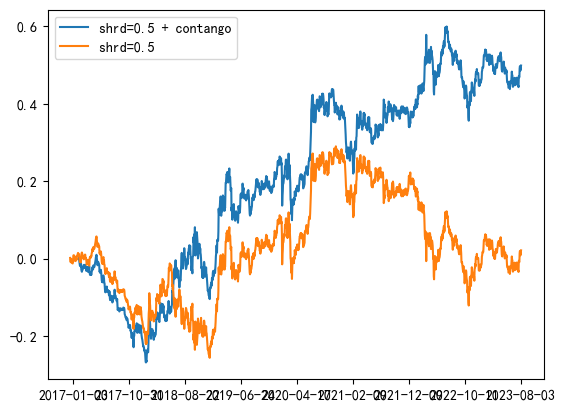

In [3766]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=0.5 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=0.5 ').cumsum().plot(legend=True)

<Axes: >

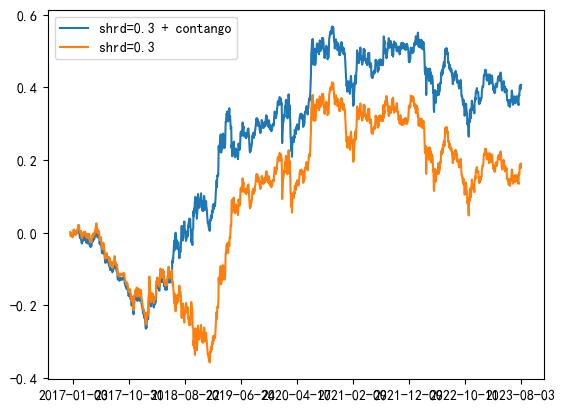

In [3769]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=0.3 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['300']).rename('shrd=0.3 ').cumsum().plot(legend=True)

<Axes: >

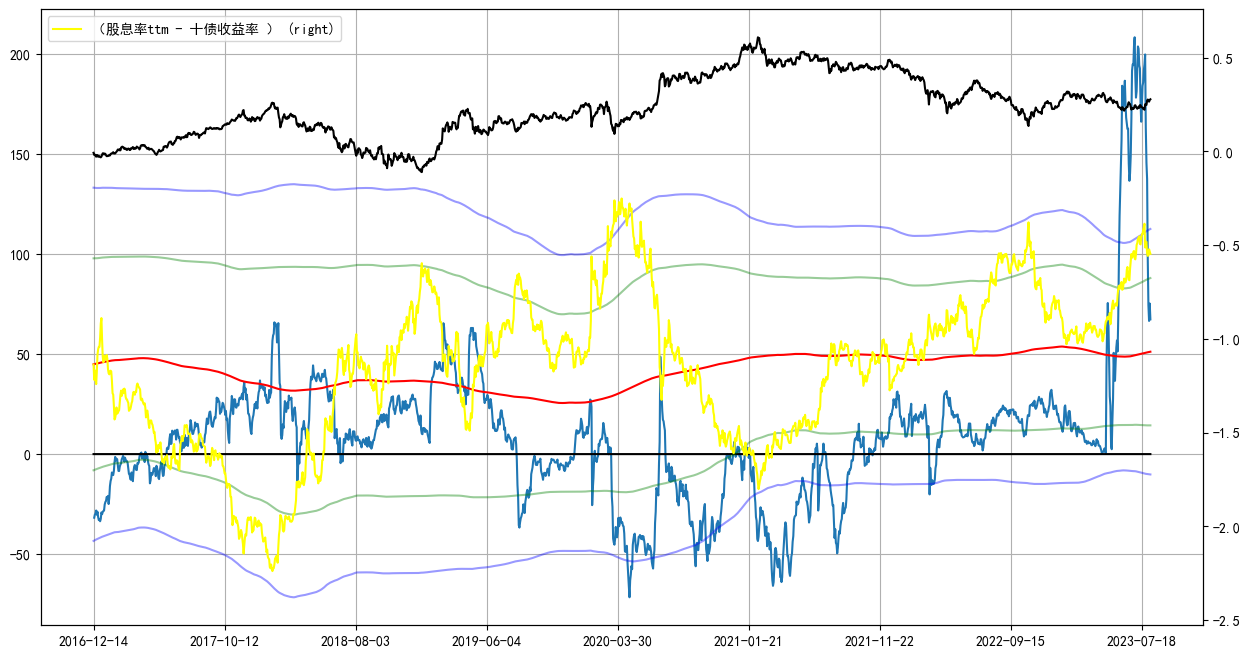

In [52]:
(IF['CS-test']).loc['2016-12-14':'2023-08-04'].ewm(1).mean().shift().plot()
pd.Series(0,(-IF['CS-test']).loc['2016-12-14':'2023-08-04'].rolling(1).mean().index).plot(color='black',grid=True)
(xy.Index_rets.loc['300',index_YSBgap1.index & (IF['CS-test']).loc['2016-12-14':'2023-08-04'].index].cumsum()/1).plot(figsize=(15,8),color='black',grid=True,secondary_y=True)
# index_YSBgap1.loc[ index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.9)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
# index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.5)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
# index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.1)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()+2*x.std()).loc['2016-12-14':'2023-08-04'].plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()-2*x.std()).loc['2016-12-14':'2023-08-04'].plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()).loc['2016-12-14':'2023-08-04'].plot(color='red',alpha=1,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()+1.2*x.std()).loc['2016-12-14':'2023-08-04'].plot(color='green',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720).apply(lambda x: x.mean()-1.2*x.std()).loc['2016-12-14':'2023-08-04'].plot(color='green',alpha=0.4,figsize=(15,8),secondary_y=True)


# index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':end_d].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()+3*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
# index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':end_d].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()-3*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
(index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2016-12-14':'2023-08-04'].index,300].rename('（股息率ttm - 十债收益率 ）').plot(figsize=(15,8),color='yellow',secondary_y=True,legend='True')

<Axes: >

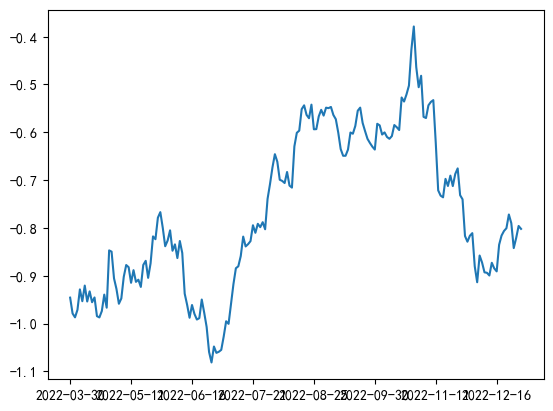

In [65]:
(index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2022-03-30':'2022-12-30'].index,300].plot()

In [3846]:
SIGS = pd.concat([
    (IF['CS-test']).loc['2010-05-04':'2023-08-04'],
    (index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,500].rename('DB'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()+.3*x.std()).loc['2016-12-14':'2023-08-04'].rename('upline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()-.3*x.std()).loc['2016-12-14':'2023-08-04'].rename('downline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()).loc['2016-12-14':'2023-08-04'].rename('midline')
],axis=1).shift().loc['2016-01-04':]

In [3847]:
position = {}
position1 = {}
pre_sig = np.nan

for d, row in SIGS.dropna().iterrows():
    if row.DB <= row.downline:
        position1[d] = -1
    elif row.DB >= row.downline:
        position1[d] = 1
    else:
        position1[d] = np.nan
        
    
    if row['CS-test'] < 0:
        if row.DB <= row.downline:
            position[d] = -1
        else:
            position[d] = np.nan
            
    elif row['CS-test'] > 0:
        if row.DB >= row.upline:
            position[d] = 1
        else:
            position[d] = np.nan
    else:
        position[d] = np.nan


## 500

In [3767]:
SIGS = pd.concat([
    (IF['CS-test']).loc['2010-05-04':'2023-08-04'],
    (index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,500].rename('DB'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()+.3*x.std()).loc['2016-12-14':'2023-08-04'].rename('upline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()-.3*x.std()).loc['2016-12-14':'2023-08-04'].rename('downline'),
    index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-05-04':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()).loc['2016-12-14':'2023-08-04'].rename('midline')
],axis=1).shift().loc['2016-01-04':]

In [3768]:
position = {}
position1 = {}
pre_sig = np.nan

for d, row in SIGS.dropna().iterrows():
    if row.DB <= row.downline:
        position1[d] = -1
    elif row.DB >= row.downline:
        position1[d] = 1
    else:
        position1[d] = np.nan
        
    
    if row['CS-test'] < 0:
        if row.DB <= row.downline:
            position[d] = -1
        else:
            position[d] = np.nan
            
    elif row['CS-test'] > 0:
        if row.DB >= row.upline:
            position[d] = 1
        else:
            position[d] = np.nan
    else:
        position[d] = np.nan


<Axes: >

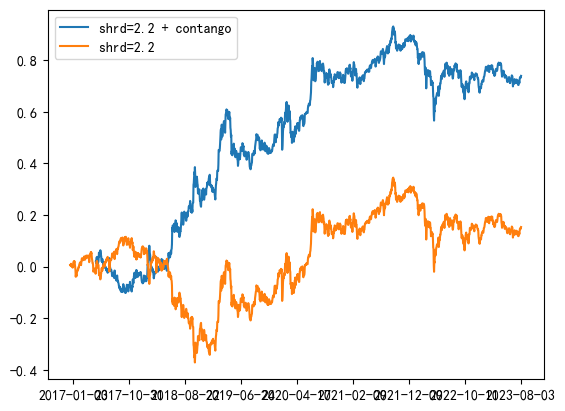

In [3818]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=2.2 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=2.2 ').cumsum().plot(legend=True)

<Axes: >

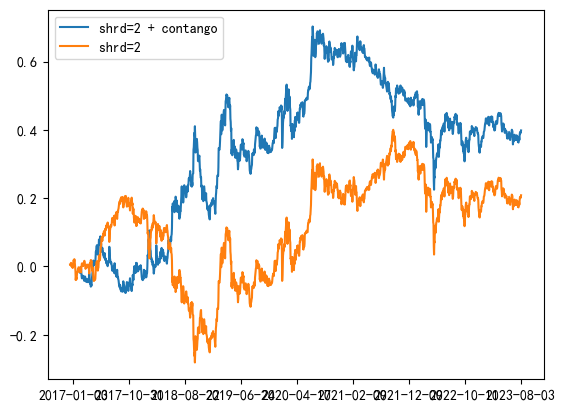

In [3821]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=2 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=2 ').cumsum().plot(legend=True)

<Axes: >

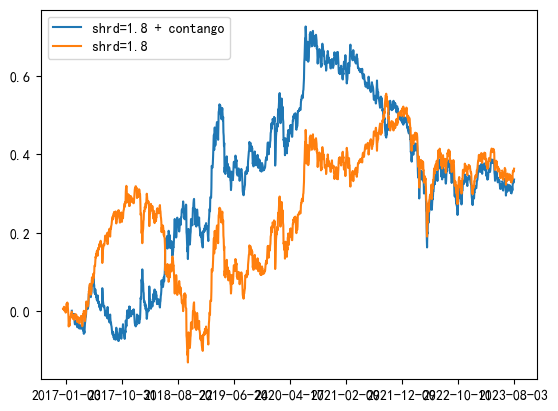

In [3836]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=1.8 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=1.8 ').cumsum().plot(legend=True)

<Axes: >

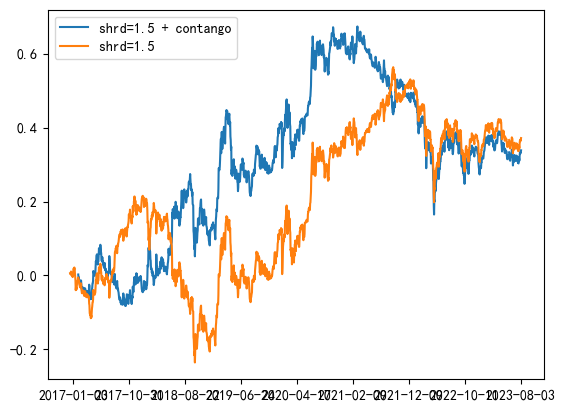

In [3839]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=1.5 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=1.5 ').cumsum().plot(legend=True)

<Axes: >

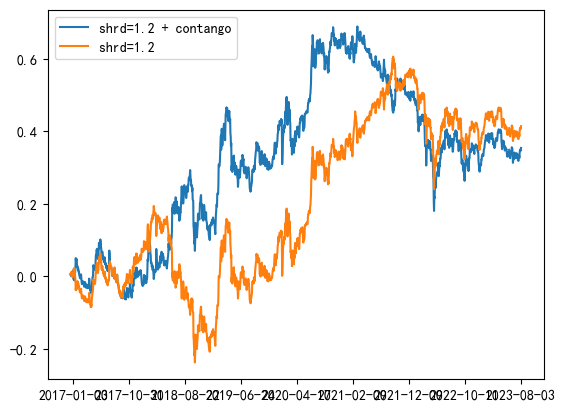

In [3842]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=1.2 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=1.2 ').cumsum().plot(legend=True)

<Axes: >

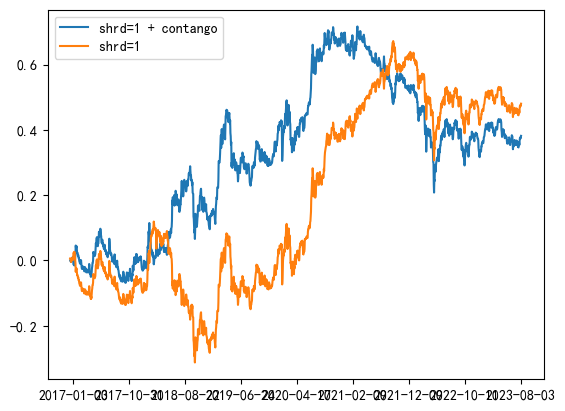

In [3845]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=1 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=1 ').cumsum().plot(legend=True)

<Axes: >

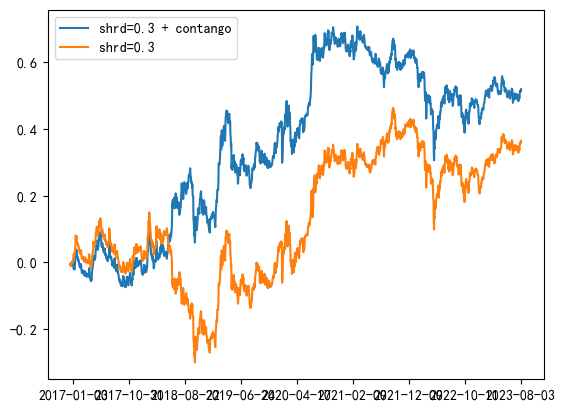

In [3848]:
(pd.Series(position).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=0.3 + contango').cumsum().plot(legend=True)
(pd.Series(position1).ffill().shift() * xy.Index_rets.loc['500']).rename('shrd=0.3 ').cumsum().plot(legend=True)

<Axes: >

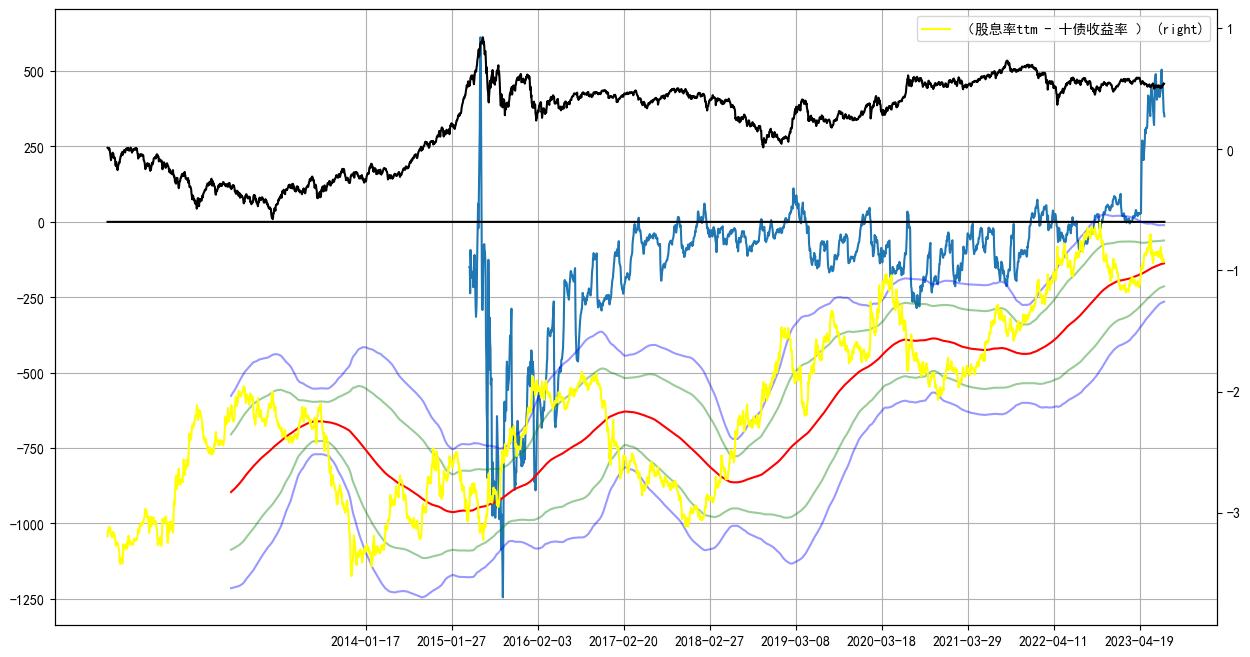

In [3811]:
(IF['CS-test']).loc['2010-12-14':'2023-08-04'].ewm(1).mean().shift().plot()
pd.Series(0,(-IF['CS-test']).loc['2010-12-14':'2023-08-04'].rolling(1).mean().index).plot(color='black',grid=True)
(xy.Index_rets.loc['500',index_YSBgap1.index & (IF['CS-test']).loc['2010-12-14':'2023-08-04'].index].cumsum()/1).plot(figsize=(15,8),color='black',grid=True,secondary_y=True)
# index_YSBgap1.loc[ index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.9)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
# index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.5)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
# index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,300].rolling(720,min_periods=1).apply(lambda x: x.quantile(0.1)).loc['2016-12-14':'2023-08-04'].plot(color='orange',secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()+2*x.std()).loc['2010-12-14':'2023-08-04'].plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()-2*x.std()).loc['2010-12-14':'2023-08-04'].plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()).loc['2010-12-14':'2023-08-04'].plot(color='red',alpha=1,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()+1.2*x.std()).loc['2010-12-14':'2023-08-04'].plot(color='green',alpha=0.4,figsize=(15,8),secondary_y=True)
index_YSBgap1.loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,500].rolling(360).apply(lambda x: x.mean()-1.2*x.std()).loc['2010-12-14':'2023-08-04'].plot(color='green',alpha=0.4,figsize=(15,8),secondary_y=True)


# index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':end_d].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()+3*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
# index_YSBgap1.loc[(IF['CS-test']).loc['2010-05-04':end_d].rolling(20).mean().dropna().index & index_YSBgap1.index,300].rolling(240).apply(lambda x: x.mean()-3*x.std()).plot(color='blue',alpha=0.4,figsize=(15,8),secondary_y=True)
(index_YSBgap1).loc[index_YSBgap1.index&(IF['CS-test']).loc['2010-12-14':'2023-08-04'].index,500].rename('（股息率ttm - 十债收益率 ）').plot(figsize=(15,8),color='yellow',secondary_y=True,legend='True')

In [3106]:
shrd = (IF['convex']**(1/2)).median()

In [3107]:
(IF['convex']**(1/2)).loc[start_d:end_d].shift(1).describe()

count    1774.000000
mean        0.012341
std         0.008604
min         0.000045
25%         0.006912
50%         0.010267
75%         0.015206
max         0.106782
Name: convex, dtype: float64

<Axes: >

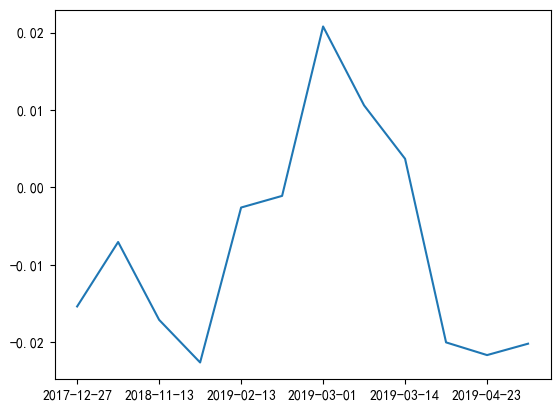

In [3058]:
((mix*2500 - (mix*2500).median()).map(lambda x: 1 if x>1 else (-1 if x<-1 else x)).dropna().shift() * xy.Index_rets.loc['300',start_d:end_d]).dropna().cumsum().plot()

In [3108]:
(IF['convex']**(1/2)).rolling(1).mean().loc[start_d:end_d].shift(1).corr(xy.Index_rets.loc['300',start_d:end_d])

0.049248599231936446

<Axes: >

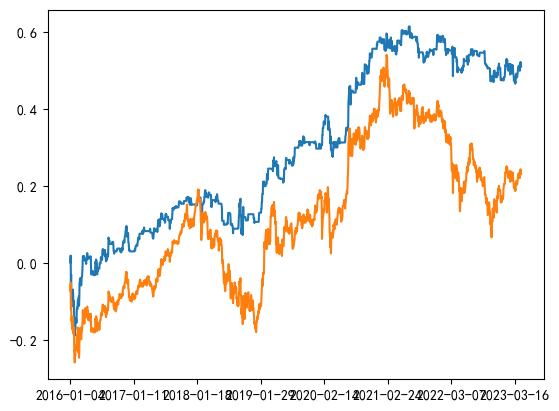

In [3109]:
long = pd.Series(((xy.Index_rets.loc['300',start_d:end_d][(IF['convex']**(1/2)).loc[start_d:end_d].shift(1)>shrd])))
pd.Series(long,index=xy.Index_rets.loc['300',start_d:end_d].index).cumsum().ffill().plot()
xy.Index_rets.loc['300',start_d:end_d].cumsum().plot()

<Axes: >

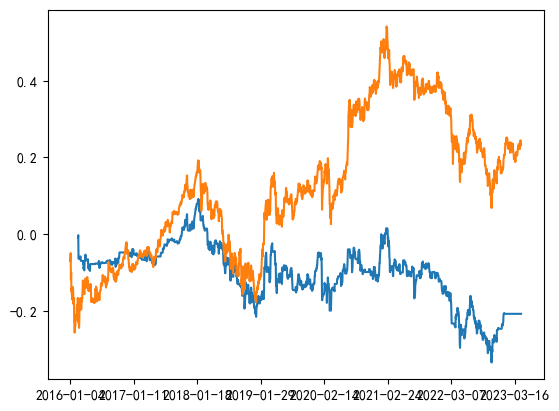

In [3110]:
short = pd.Series(((xy.Index_rets.loc['300',start_d:end_d][(IF['convex']**(1/2)).loc[start_d:end_d].shift(1)<shrd])))
pd.Series(short,index=xy.Index_rets.loc['300',start_d:end_d].index).cumsum().ffill().plot()
xy.Index_rets.loc['300',start_d:end_d].cumsum().plot()

<Axes: >

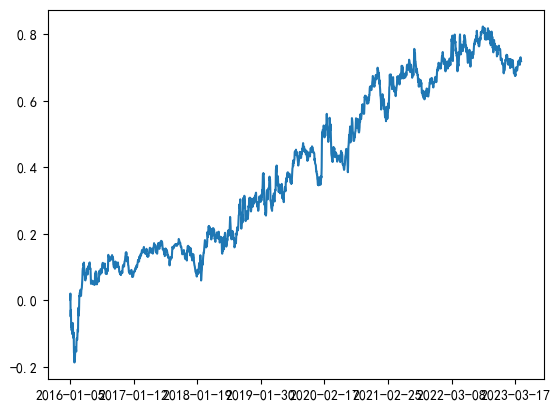

In [3111]:
pd.concat([long,-short]).sort_index().cumsum().plot()

In [2420]:
(mix-shrd).shift(1).describe()

count    1969.000000
mean        0.000190
std         0.000669
min        -0.000200
25%        -0.000098
50%         0.000010
75%         0.000210
max         0.009677
Name: convex, dtype: float64

In [2448]:
IF['CS-test'].rolling(1).mean().loc[start_d:end_d].shift(1).map(lambda x:1 if x > 0 else -1)

2017-01-04   -1
2017-01-05   -1
2017-01-06    1
2017-01-09    1
2017-01-10    1
             ..
2023-04-14   -1
2023-04-17   -1
2023-04-18   -1
2023-04-19   -1
2023-04-20   -1
Name: CS-test, Length: 1530, dtype: int64

<Axes: >

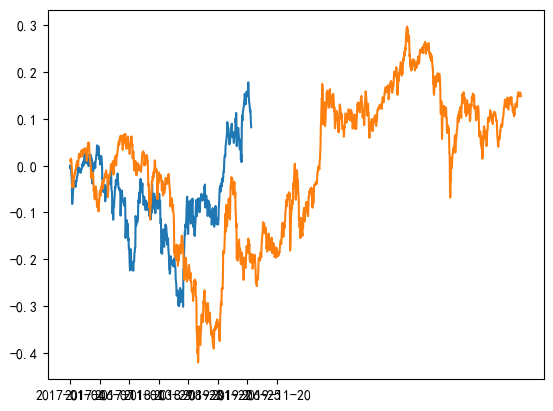

In [2577]:
(((mix-shrd).shift(1).map(lambda x: x if (x)<1 else 1 ).map(lambda x:x**(1/73) if x > 0 else -(-x)**(1/73)))  * xy.Index_rets.loc['1000',start_d:end_d]).dropna().cumsum().ffill().plot()
xy.Index_rets.loc['300',start_d:end_d].cumsum().plot()

In [2462]:
sig = IF['CS-test'].rolling(1).mean().loc[start_d:end_d].shift(1).map(lambda x:1 if x > 0 else -1)

<Axes: >

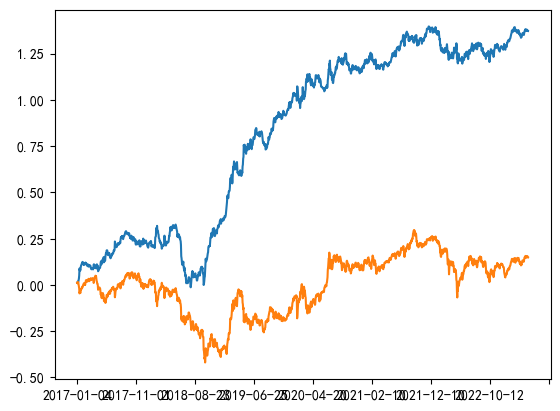

In [2463]:
(((mix-shrd).shift(1).map(lambda x: x if (x)<1 else 1 ).map(lambda x:x**(1/73) if x > 0 else (-x)**(1/73))) * (-sig) * xy.Index_rets.loc['1000',start_d:end_d]).dropna().cumsum().ffill().plot()
xy.Index_rets.loc['300',start_d:end_d].cumsum().plot()

In [1271]:
().rolling(1).mean().loc[start_d:end_d].shift(1).corr(xy.Index_rets.loc['300',start_d:end_d])

-0.03325236264531415

<Axes: >

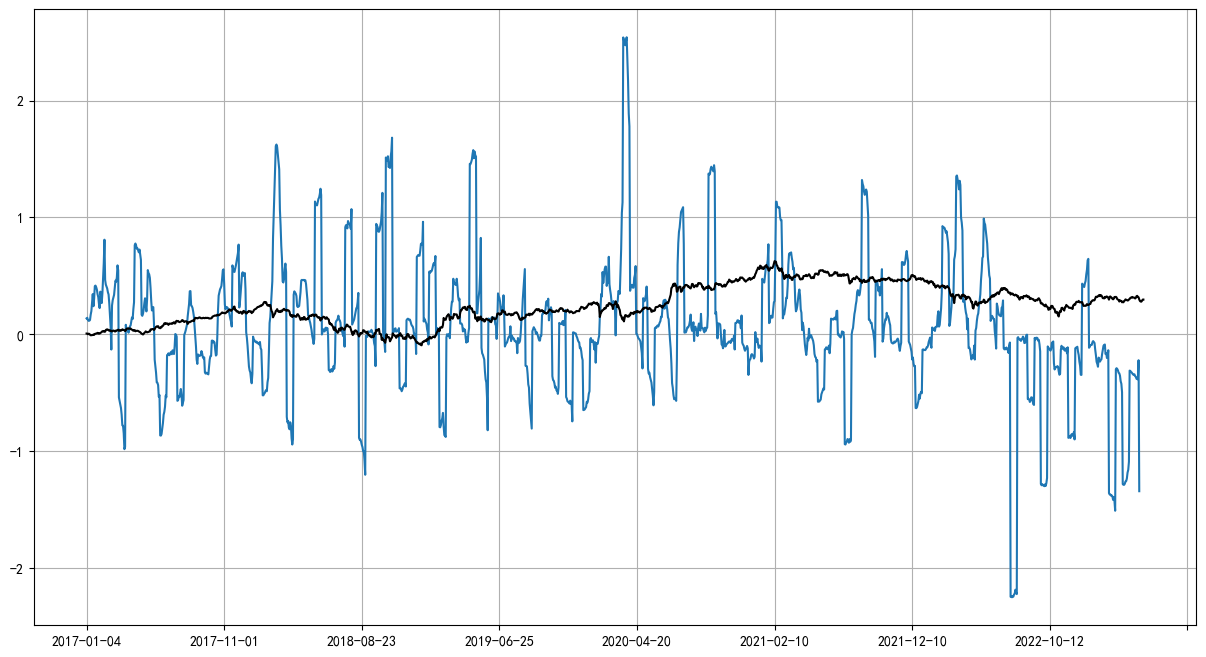

In [1230]:
# (IF['contago1'].abs()**(1/5)*np.sign(IF['contago1'])).rolling(20).mean().loc[start_d:end_d].plot()
IF['CS-test'].rolling(10).mean().loc[start_d:end_d].plot()
# (IF['convex']).rolling(20).mean().loc[start_d:end_d].plot(secondary_y=True)
(xy.Index_rets.loc['300',start_d:end_d].cumsum()/1).plot(figsize=(15,8),color='black',grid=True)

<Axes: >

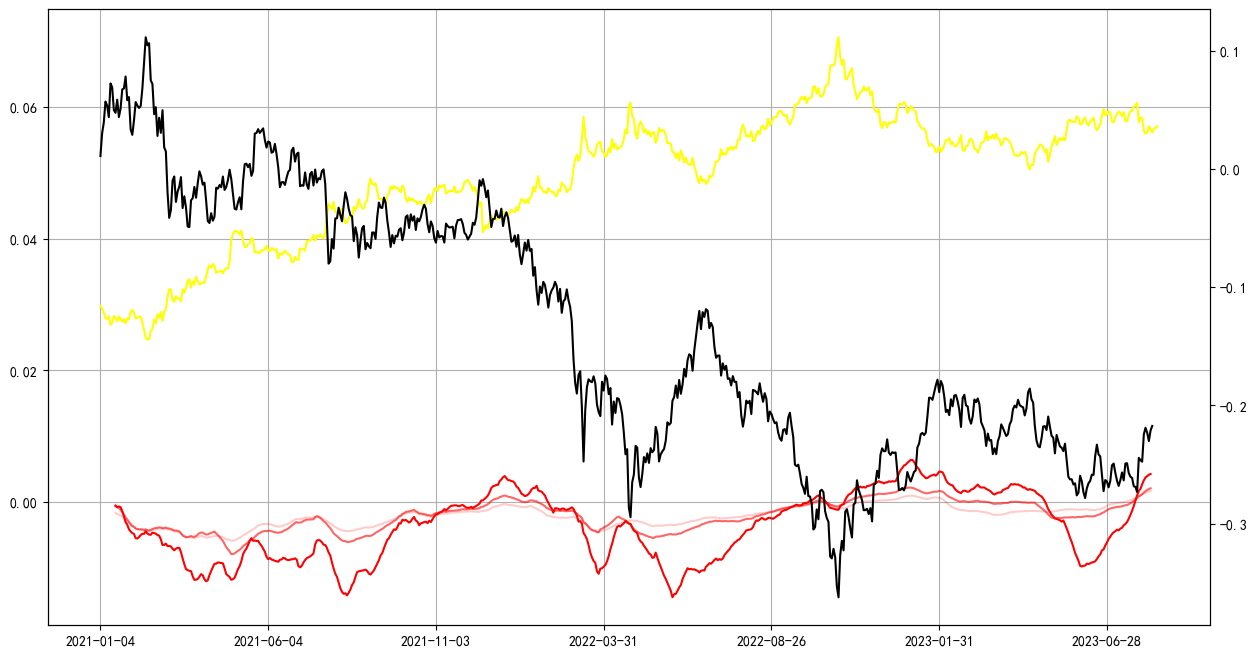

In [138]:
IF['C2-C1/C1'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')].rolling(1).mean() - IF['300'])/IF['300'].rolling(1).mean()
IF['C3-C1/C1'] = (IF[('IF00C3.CFE', 'IF下季连续', '收盘价')].rolling(1).mean() - IF['300'])/IF['300'].rolling(1).mean()
IF['C4-C1/C1'] = (IF[('IF00C4.CFE', 'IF隔季连续', '收盘价')].rolling(1).mean() - IF['300'])/IF['300'].rolling(1).mean()
# IF['C2-C1/C1'] = (IF[('IF00C2.CFE', 'IF下月连续', '收盘价')] - IF[('IF00C1.CFE', 'IF当月连续', '收盘价')])/IF[('IF00C1.CFE', 'IF当月连续', '收盘价')]

IF['contago1'] = (1 + IF['C2-C1/C1'])   #* (1 + IF['C4-C1/C1'])
IF['contago2'] = (1 + IF['C3-C1/C1']/4)
IF['contago3'] = (1 + IF['C4-C1/C1']/7)


# IF['C2-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C3-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
# IF['C4-C1/C1'].loc['2015-05-04':].rolling(1).mean().plot(figsize=(15,8),grid=True)
(IF['contago1'].loc['2021-01-04':].rolling(10).mean()-1).plot(figsize=(15,8),color='red')
(IF['contago2'].loc['2021-01-04':].rolling(10).mean()-1).plot(figsize=(15,8),color='red',alpha=0.6)
(IF['contago3'].loc['2021-01-04':].rolling(10).mean()-1).plot(figsize=(15,8),color='red',alpha=0.2)

# (IF['C4-C1/C1'].loc['2015-05-04':].rolling(10).mean() - IF['C2-C1/C1'].loc['2015-05-04':].rolling(10).mean()).plot(figsize=(15,8),grid=True)
# (IF['C4-C1/C1'].loc['2015-05-04':].rolling(10).mean() - IF['C3-C1/C1'].loc['2015-05-04':].rolling(10).mean()).plot(figsize=(15,8),grid=True)

(index_YSBgap/100).loc['2021-01-04':,'300'].plot(figsize=(15,8),grid=True,color='yellow')
# plt.show()
xy.Index_rets.loc['300','2021-01-04':].cumsum().plot(figsize=(15,8),secondary_y=True,color='black')
# IF_hold.apply(lambda x:x/IF_hold.sum(axis=1)).loc['2015-05-04':,('IF00C4.CFE', 'IF隔季连续', '持仓量')].plot(figsize=(15,8),secondary_y=True)

## 计算

In [3281]:
index_YSBgap = pd.read_csv('E:\PyProject\Index_valuation\index_YSBgap.csv',index_col=0)

index_YSBgap1 = pd.read_excel(r'E:\PyProject\Index_valuation\index_YSBgap1.xlsx',index_col=0)
index_YSBgap1.index = index_YSBgap1.index.map(lambda x:str(x)[:10]) 

<Axes: >

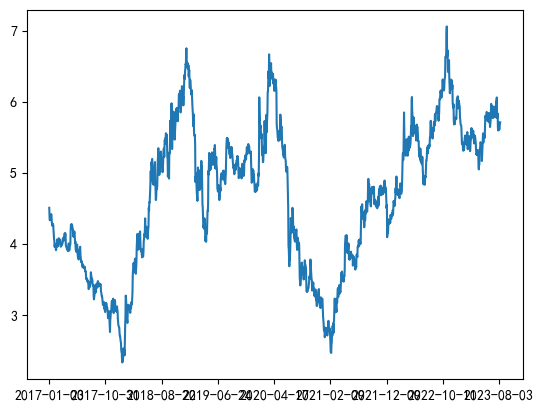

In [3253]:
index_YSBgap['300'].plot()